# Project: Wrangle and Analyze Twitter Data of 'WeRateDogs'

### Project Overview
In this project, I am going to analyze twitter data for an account called "WeRateDogs". This workbook will be divided into two major parts, data wrangling and data analysis / visulization. 

### Table of Contents

<ul>
<li><a href="#gather">Gather</a></li>
<li><a href="#assess">Assess</a></li>
<li><a href="#clean">Clean</a></li>
<li><a href="#store">Store</a></li>
<li><a href="#analysis">Analysis & Visualization</a></li>

</ul>

<a id='gather'></a>
## Gather

In [1]:
import pandas as pd
import numpy as np
import requests
import os
import tweepy
import json
from pandas.io.json import json_normalize
from timeit import default_timer as timer
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

In [2]:
# Load the WeRateDogs Twitter archive csv file into workbook
archive = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
# Check out if the csv file is loaded properly
archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [4]:
# Download the Tweet Images Predictions file programmatically

folder_name = 'img_predictions'

if not os.path.exists(folder_name):
    os.makedirs(folder_name)

r = requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')

with open(folder_name + '/' + "image_predictions.tsv", mode = 'wb') as out_file:
    out_file.write(r.content)
    
preditions = pd.read_csv('img_predictions/image_predictions.tsv', sep='\t',encoding='utf-8')

In [5]:
preditions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [10]:
# Gather additional data by querying from Twitter's API using tweepy
consumer_key = 'x'
consumer_secret = 'y'
access_token = 'a'
access_secret = 'b'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit = True, 
                 wait_on_rate_limit_notify = True,
                 parser = tweepy.parsers.JSONParser())

In [11]:
# Retrieve twitter data for each tweet ID provided in archive dataset and 
# export it as a JSON file

start = timer()
tweet_list = []
for tweet_id in archive.tweet_id:
    try:
        tweet = api.get_status(tweet_id, tweet_mode='extended')
        tweet_list.append(tweet)
    
    except tweepy.TweepError:
        continue
    
with open('tweet_json.txt','w') as outfile:
    json.dump(tweet_list, outfile)
    
end = timer()
print(end - start)

Rate limit reached. Sleeping for: 733
Rate limit reached. Sleeping for: 733
1916.6281941630004


In [6]:
# Convert the JSON file to a pandas Dataframe
with open('tweet_json.txt',) as json_file:
    tweet_api_data = json.load(json_file)

df_api = pd.DataFrame.from_dict(json_normalize(tweet_api_data),
                                orient='columns')

In [7]:
# Extract the useful columns from the dataset to form a final dataframe

new_df_api = df_api[['id','retweet_count','favorite_count']]

In [8]:
# Rename the column names for consistency

new_df_api = new_df_api.rename(columns={"id": "tweet_id"})

In [9]:
# Check out if the dataframe is loaded properly

new_df_api.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,7743,36402
1,892177421306343426,5736,31354
2,891815181378084864,3796,23627
3,891689557279858688,7908,39706
4,891327558926688256,8535,37921


<a id='assess'></a>
## Assessment

In [10]:
# Get overviews for these three tables to check if the datatypes of variables are correct.

archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [11]:
preditions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [12]:
new_df_api.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 3 columns):
tweet_id          2331 non-null int64
retweet_count     2331 non-null int64
favorite_count    2331 non-null int64
dtypes: int64(3)
memory usage: 54.7 KB


In [13]:
# Look through the tables and do a first assessment visually.

archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [14]:
archive.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
40,884562892145688576,NaN,NaN,2017-07-11 00:00:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Kevin. He's just so happy. 13/10 what ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/884562892...,13,10,Kevin,None,None,None,None
1662,682962037429899265,NaN,NaN,2016-01-01 16:30:13 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darrel. He just robbed a 7/11 and is i...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/682962037...,7,11,Darrel,None,None,None,None
2036,671729906628341761,6.715610e+17,4.196984e+09,2015-12-01 16:37:44 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I'm just going to leave this one here as well....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671729906...,13,10,None,None,None,None,None
2197,668826086256599040,NaN,NaN,2015-11-23 16:18:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Banditt. He is a brown LaBeouf retriev...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668826086...,10,10,Banditt,None,None,None,None
1866,675349384339542016,6.749998e+17,4.196984e+09,2015-12-11 16:20:15 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Yea I lied. Here's more. All 13/10 https://t.c...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675349384...,13,10,None,None,None,None,None


In [15]:
preditions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [16]:
new_df_api

,tweet_id,retweet_count,favorite_count
0,892420643555336193,7743,36402
1,892177421306343426,5736,31354
2,891815181378084864,3796,23627
3,891689557279858688,7908,39706
4,891327558926688256,8535,37921
5,891087950875897856,2856,19090
6,890971913173991426,1861,11116
7,890729181411237888,17280,61372
8,890609185150312448,3936,26289
9,890240255349198849,6738,30027


In [17]:
# Get a summary statistics for each table to see in which column numbers are off.

archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [18]:
preditions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [19]:
new_df_api.describe()

,tweet_id,retweet_count,favorite_count
count,2.331000e+03,2331.000000,2331.000000
mean,7.419079e+17,2718.889747,7603.220506
std,6.823170e+16,4599.247300,11799.291599
min,6.660209e+17,1.000000,0.000000
25%,6.782670e+17,549.500000,1327.500000
50%,7.182469e+17,1274.000000,3310.000000
75%,7.986692e+17,3157.000000,9317.000000
max,8.924206e+17,78288.000000,157179.000000


In [20]:
# Count how many times that 'a' / 'an'/ 'the' appear in the column of Name in archive table.

archive.name.value_counts()

None        745
a            55
Charlie      12
Cooper       11
Oliver       11
Lucy         11
Tucker       10
Lola         10
Penny        10
Winston       9
Bo            9
Sadie         8
the           8
Bailey        7
an            7
Daisy         7
Buddy         7
Toby          7
Scout         6
Bella         6
Jax           6
Stanley       6
Dave          6
Jack          6
Oscar         6
Koda          6
Leo           6
Milo          6
Rusty         6
Finn          5
           ... 
Derby         1
Rambo         1
Mutt          1
Tom           1
Jerome        1
Storkson      1
Combo         1
Tommy         1
Shelby        1
Socks         1
Jimbo         1
Izzy          1
Billy         1
Claude        1
such          1
Mabel         1
Jay           1
Clyde         1
Dunkin        1
Wishes        1
Deacon        1
Beebop        1
Ebby          1
Dietrich      1
Stella        1
Anthony       1
Charl         1
Filup         1
Pluto         1
Ester         1
Name: name, Length: 957,

In [21]:
archive.rating_numerator.sort_values()

315        0
1016       0
2335       1
2261       1
2338       1
605        1
1446       1
1869       1
2091       1
2038       1
1940       1
1764       2
2310       2
1761       2
1920       2
2246       2
2237       2
2349       2
2326       2
2079       2
2305       3
1249       3
1898       3
1478       3
1692       3
2202       3
765        3
1928       3
1314       3
2183       3
        ... 
866       14
83        14
291       15
285       15
55        17
1663      20
516       24
1712      26
763       27
1433      44
1274      45
1202      50
1351      60
340       75
695       75
1254      80
433       84
1843      88
1228      99
1635     121
1634     143
1779     144
902      165
290      182
1120     204
2074     420
188      420
189      666
313      960
979     1776
Name: rating_numerator, Length: 2356, dtype: int64

In [13]:
archive.rating_denominator.sort_values()

313       0
2335      2
516       7
1576     10
1575     10
1574     10
1573     10
1572     10
1563     10
1570     10
1569     10
1568     10
1567     10
1566     10
1565     10
1564     10
1577     10
1571     10
0        10
1562     10
1547     10
1548     10
1549     10
1550     10
1551     10
1552     10
1553     10
1554     10
1555     10
1556     10
       ... 
782      10
781      10
775      10
799      10
780      10
779      10
776      10
777      10
778      10
800      10
784      11
1068     11
1662     11
342      15
1663     16
1165     20
1598     20
1433     40
1202     50
1351     50
1274     50
433      70
1843     80
1254     80
1228     90
1635    110
1779    120
1634    130
902     150
1120    170
Name: rating_denominator, Length: 2356, dtype: int64

In [22]:
archive.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [23]:
new_df_api.favorite_count.sort_values()

913          0
415          0
409          0
406          0
404          0
399          0
395          0
418          0
390          0
381          0
872          0
1218         0
370          0
885          0
351          0
383          0
345          0
419          0
863          0
463          0
460          0
459          0
453          0
919          0
449          0
422          0
446          0
437          0
434          0
846          0
         ...  
639      46336
55       46625
53       47751
130      50168
848      50177
1089     50249
606      50994
443      52781
350      53761
379      57598
7        61372
118      62427
22       64857
342      67649
41       68492
148      71566
37       72766
76       74925
1805     75391
520      76720
1741     78779
111      78904
162      86961
433      88602
65       99764
1055    116057
129     117012
517     121412
397     133910
1015    157179
Name: favorite_count, Length: 2331, dtype: int64

#### Quality Issues:

##### `archive` table

- Some rows are just retweets, not the tweets originated from WeRateDogs.
- The format of 'timestamp' column is float instead of date.
- Source info is wrapped by HTML codes.
- Some dogs'names are just 'a' / 'an'/ 'the' not real names.
- Zeros exist in the column of 'rating_numerator'.
- Zero and '2' exist in the column of 'rating_denominator', whereas the values for this column should be fixed, which is 10.

##### `preditions` table

- Some breed names are lowercased.
- Some texts in p1/p2/p3 are not considered as dog breeds.


##### `new-df-api` table

- The minimum of favorite count is zero and the retweet count column has some values less than 10. These numbers are too low to be true for a popular twitter account.


#### Tidiness Issues:

- Names of different stages for dogs are split into four different columns.
- `new_df_api` table should be part of the `archive` table.
- `preditions` table has 3 similar sets of columns.

<a id='clean'></a>
## Clean

In [24]:
# Before cleaning the data, three copies of original dataset are created. Further modifications
# on tables will be implemented on the copies.

archive_clean = archive.copy()
preditions_clean = preditions.copy()
api_clean = new_df_api.copy()

### Quality

#### 1) Some rows are just retweets.

##### Define:
Remove the rows with valid retweeted_status_id.

In [25]:
archive_clean = archive_clean[archive_clean['retweeted_status_id'].isnull()]

##### Test

In [26]:
archive_clean['retweeted_status_id'].value_counts()

Series([], Name: retweeted_status_id, dtype: int64)

#### 2) The format of Timestamp is float instead of date.

##### Define:
Convert the datatype of timestamp column to datetime format using pandas' to_datetime function. 

In [27]:
archive_clean.timestamp = pd.to_datetime(archive_clean.timestamp)

##### Test

In [28]:
archive_clean.timestamp

0      2017-08-01 16:23:56
1      2017-08-01 00:17:27
2      2017-07-31 00:18:03
3      2017-07-30 15:58:51
4      2017-07-29 16:00:24
5      2017-07-29 00:08:17
6      2017-07-28 16:27:12
7      2017-07-28 00:22:40
8      2017-07-27 16:25:51
9      2017-07-26 15:59:51
10     2017-07-26 00:31:25
11     2017-07-25 16:11:53
12     2017-07-25 01:55:32
13     2017-07-25 00:10:02
14     2017-07-24 17:02:04
15     2017-07-24 00:19:32
16     2017-07-23 00:22:39
17     2017-07-22 16:56:37
18     2017-07-22 00:23:06
20     2017-07-20 16:49:33
21     2017-07-19 16:06:48
22     2017-07-19 03:39:09
23     2017-07-19 00:47:34
24     2017-07-18 16:08:03
25     2017-07-18 00:07:08
26     2017-07-17 16:17:36
27     2017-07-16 23:58:41
28     2017-07-16 20:14:00
29     2017-07-15 23:25:31
30     2017-07-15 16:51:35
               ...        
2326   2015-11-17 00:24:19
2327   2015-11-17 00:06:54
2328   2015-11-16 23:23:41
2329   2015-11-16 21:54:18
2330   2015-11-16 21:10:36
2331   2015-11-16 20:32:58
2

#### 3) Source info is wrapped by HTML codes.

##### Define:
Extract the source name from codes.

In [29]:
# Use BeautifulSoup to extract the anchor text from the HTML codes

from bs4 import BeautifulSoup

new_source = []

for info in archive_clean['source']:
    soup = BeautifulSoup(info, 'html.parser')
    source_text = soup.find("a").get_text()
    new_source.append(source_text)

In [30]:
# Join the new column for source with the archive table

archive_clean = archive_clean.join(pd.Series(new_source, name = 'source_name'))

In [31]:
# Now it's time to drop the original source column

archive_clean = archive_clean.drop('source', axis = 1)

##### Test

In [32]:
# Confirm if the text have been extracted properly and count the number of categories

pd.Series(new_source).value_counts()

Twitter for iPhone     2042
Vine - Make a Scene      91
Twitter Web Client       31
TweetDeck                11
dtype: int64

#### 4) Some dogs'names are just 'a' / 'an'/ 'the' not real names.

###### Define:
Replace the 'a', 'an' and 'the' with 'None'.

In [33]:
archive_clean['name'] = archive_clean['name'].str.replace('a','None')
archive_clean['name'] = archive_clean['name'].str.replace('an','None')
archive_clean['name'] = archive_clean['name'].str.replace('the','None')

##### Test

In [34]:
# If the column is clear with 'a', 'an' and 'the', there should be 0 record.

archive_clean.query('name == "a" or name == "an" or name == "the"')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,source_name


#### 5) Zeros exist in the column of 'rating_numerator'.

##### Define:
Replace the zeros with the median value of 'rating_numerator'.

In [35]:
median_rating = archive_clean.loc[archive_clean['rating_numerator'] > 0]['rating_numerator'].median()

archive_clean['rating_numerator'] = archive_clean['rating_numerator'].replace(0,median_rating)

##### Test

In [36]:
# Now zero is gone
archive_clean['rating_numerator'].value_counts()

12      500
10      442
11      428
13      307
9       156
8        98
7        54
14       43
5        36
6        32
3        19
4        17
2         9
1         8
420       2
15        1
1776      1
121       1
99        1
75        1
45        1
27        1
17        1
20        1
24        1
26        1
44        1
50        1
60        1
80        1
84        1
88        1
144       1
182       1
204       1
143       1
666       1
960       1
165       1
Name: rating_numerator, dtype: int64

#### 6) Zero and other numbers that are not ten exist in the column of 'rating_denominator'. 

The values for this column should be fixed, which is 10.

###### Define:
Replace these numbers with the number of 10.

In [37]:
archive_clean['rating_denominator'] = archive_clean['rating_denominator'].mask(archive_clean['rating_denominator'] != 10, 
                                                             10)

##### Test

In [38]:
# After cleaning, those zeros and other non-ten numbers no longer exist.

archive_clean['rating_denominator'].value_counts()

10    2175
Name: rating_denominator, dtype: int64

#### 7) Some breed names are lowercased.

###### Define:

Capitalize the first letter of the names.

In [39]:
preditions_clean.p1 = preditions_clean.p1.str.capitalize()
preditions_clean.p2 = preditions_clean.p2.str.capitalize()
preditions_clean.p3 = preditions_clean.p3.str.capitalize()

##### Test

In [40]:
preditions_clean.p1

0            Welsh_springer_spaniel
1                           Redbone
2                   German_shepherd
3               Rhodesian_ridgeback
4                Miniature_pinscher
5              Bernese_mountain_dog
6                        Box_turtle
7                              Chow
8                     Shopping_cart
9                  Miniature_poodle
10                 Golden_retriever
11                    Gordon_setter
12                     Walker_hound
13                              Pug
14                       Bloodhound
15                            Lhasa
16                   English_setter
17                              Hen
18                 Desktop_computer
19                Italian_greyhound
20                      Maltese_dog
21                 Three-toed_sloth
22                               Ox
23                 Golden_retriever
24                         Malamute
25                       Guinea_pig
26      Soft-coated_wheaten_terrier
27                        Ch

#### 8) The minimum of favorite count is zero and the retweet count column has some values less than 10. These numbers are too low to be true for a popular twitter account.

###### Define:
Replace the zeros and the values less than 10 with the medians. I prefer using the median value because it is not affected heavily by the outliers.

In [41]:
median_favorite = api_clean.loc[api_clean['favorite_count'] > 0]['favorite_count'].median()
api_clean['favorite_count'] = api_clean['favorite_count'].replace(0, median_favorite)

In [42]:
median_retweet = api_clean.loc[api_clean['retweet_count'] > 10]['retweet_count'].median()
api_clean['retweet_count'] = api_clean['retweet_count'].mask(api_clean['retweet_count'] < 10, 
                                                             median_retweet)

##### Test

In [43]:
api_clean.loc[api_clean['favorite_count'] == 0]

,tweet_id,retweet_count,favorite_count


In [44]:
api_clean.loc[api_clean['retweet_count'] < 10]

,tweet_id,retweet_count,favorite_count


### Tidiness

#### Dog stages names are split into four different columns.

##### Define
Put multiple columns of dog stages under one column.

In [45]:
# Concatenate all the columns of dog stages' names so that all the text become one string.

archive_clean['dog_stage'] = archive_clean['doggo'] + archive_clean['floofer'] + archive_clean['pupper'] + archive_clean['puppo']

In [46]:
# Replace the string of 'NoneNoneNoneNone' with 'NA', representing stage not available.

archive_clean['dog_stage'] = archive_clean['dog_stage'].str.replace('NoneNoneNoneNone','NA')

In [47]:
# Get rid of the 'None' for the cells containing stages' names.

archive_clean['dog_stage'] = archive_clean['dog_stage'].str.replace('None','')

In [48]:
# Split those with multiple stages with comma.

archive_clean.loc[archive_clean.dog_stage == 'doggopupper', 'dog_stage'] = 'doggo,pupper'
archive_clean.loc[archive_clean.dog_stage == 'doggopuppo', 'dog_stage'] = 'doggo,puppo'
archive_clean.loc[archive_clean.dog_stage == 'doggofloofer', 'dog_stage'] = 'doggo,floofer'

In [49]:
# Convert the datatype of column dog_stage to category.

archive_clean.dog_stage.astype('category')

0           NA
1           NA
2           NA
3           NA
4           NA
5           NA
6           NA
7           NA
8           NA
9        doggo
10          NA
11          NA
12       puppo
13          NA
14       puppo
15          NA
16          NA
17          NA
18          NA
20          NA
21          NA
22          NA
23          NA
24          NA
25          NA
26          NA
27          NA
28          NA
29      pupper
30          NA
         ...  
2326        NA
2327        NA
2328        NA
2329        NA
2330        NA
2331        NA
2332        NA
2333        NA
2334        NA
2335        NA
2336        NA
2337        NA
2338        NA
2339        NA
2340        NA
2341        NA
2342        NA
2343        NA
2344        NA
2345        NA
2346        NA
2347        NA
2348        NA
2349        NA
2350        NA
2351        NA
2352        NA
2353        NA
2354        NA
2355        NA
Name: dog_stage, Length: 2175, dtype: category
Categories (8, object): [NA, doggo, do

In [50]:
# Time to drop those original columns of stages

archive_clean = archive_clean.drop(['doggo','floofer','pupper','puppo'],axis = 1)

###### Test

In [51]:
archive_clean.dog_stage.value_counts()

NA               1831
pupper            224
doggo              75
puppo              24
doggo,pupper       10
floofer             9
doggo,puppo         1
doggo,floofer       1
Name: dog_stage, dtype: int64

##### `new_df_api` table should be part of the `archive` table.

##### Define
Merge the api_clean table with archive_clean table.

In [52]:
archive_clean = archive_clean.merge(api_clean, how = 'left', on = 'tweet_id')

##### Test

In [53]:
archive_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,source_name,dog_stage,retweet_count,favorite_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,PhineNones,Twitter for iPhone,NA,7743.0,36402.0
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,Twitter for iPhone,NA,5736.0,31354.0
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,Twitter for iPhone,NA,3796.0,23627.0
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,DNonerlNone,Twitter for iPhone,NA,7908.0,39706.0
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,FrNonenklin,Twitter for iPhone,NA,8535.0,37921.0


#### `preditions` table has 3 similar sets of columns

##### Define:
Use the predition results which have highest confidence level only. Rename the columns as 'breed_predition', 'conf_percent','dog_or_not'.

In [54]:
preditions_clean.drop(['p2','p2_conf','p2_dog','p3','p3_conf','p3_dog'], axis=1, inplace=True)

In [55]:
preditions_clean = preditions_clean.rename(columns={"p1": "breed_predition", 
                                                    "p1_conf": "conf_percent",
                                                   "p1_dog": "dog_or_not"})

##### Test

In [56]:
preditions_clean.head()

,tweet_id,jpg_url,img_num,breed_predition,conf_percent,dog_or_not
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature_pinscher,0.560311,True


<a id='store'></a>
## Store

#### Store the clean dataframes in a CSV file with the main one named `twitter_archive_master.csv`

In [42]:
all_data = archive_clean.merge(preditions_clean, how = 'left', on = 'tweet_id')

In [43]:
all_data.to_csv('twitter_archive_master.csv',index=False)

<a id='analysis'></a>
## Analysis and Visualization

In [2]:
# Read the master CSV file

df = pd.read_csv('twitter_archive_master.csv')

In [3]:
# Confirm if the file is loaded properly

df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,...,name,source_name,dog_stage,retweet_count,favorite_count,jpg_url,img_num,breed_predition,conf_percent,dog_or_not
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,...,PhineNones,Twitter for iPhone,NaN,7743.0,36402.0,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,Orange,0.097049,False
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,...,Tilly,Twitter for iPhone,NaN,5736.0,31354.0,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,Chihuahua,0.323581,True
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,...,Archie,Twitter for iPhone,NaN,3796.0,23627.0,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,Chihuahua,0.716012,True
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,...,DNonerlNone,Twitter for iPhone,NaN,7908.0,39706.0,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1.0,Paper_towel,0.170278,False
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,...,FrNonenklin,Twitter for iPhone,NaN,8535.0,37921.0,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,Basset,0.555712,True


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2175 entries, 0 to 2174
Data columns (total 21 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null float64
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
source_name                   1996 non-null object
dog_stage                     344 non-null object
retweet_count                 2168 non-null float64
favorite_count                2168 non-null float64
jpg_url                       1994 non-null object
img_num                       1994 n

In [5]:
# Remove the columns that are unnecessary for the analysis
df = df.drop(['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id',
             'retweeted_status_user_id','retweeted_status_timestamp','expanded_urls'], 
             axis = 1)

In [6]:
# Confirm if all the columns above have been dropped properly
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2175 entries, 0 to 2174
Data columns (total 15 columns):
tweet_id              2175 non-null int64
timestamp             2175 non-null object
text                  2175 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  2175 non-null object
source_name           1996 non-null object
dog_stage             344 non-null object
retweet_count         2168 non-null float64
favorite_count        2168 non-null float64
jpg_url               1994 non-null object
img_num               1994 non-null float64
breed_predition       1994 non-null object
conf_percent          1994 non-null float64
dog_or_not            1994 non-null object
dtypes: float64(4), int64(3), object(8)
memory usage: 255.0+ KB


In [7]:
# Check out the data again
df.head()

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,source_name,dog_stage,retweet_count,favorite_count,jpg_url,img_num,breed_predition,conf_percent,dog_or_not
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,13,10,PhineNones,Twitter for iPhone,NaN,7743.0,36402.0,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,Orange,0.097049,False
1,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,13,10,Tilly,Twitter for iPhone,NaN,5736.0,31354.0,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,Chihuahua,0.323581,True
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,Twitter for iPhone,NaN,3796.0,23627.0,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,Chihuahua,0.716012,True
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,13,10,DNonerlNone,Twitter for iPhone,NaN,7908.0,39706.0,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1.0,Paper_towel,0.170278,False
4,891327558926688256,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,12,10,FrNonenklin,Twitter for iPhone,NaN,8535.0,37921.0,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,Basset,0.555712,True


Text(0.5,1,'Historgrams of All Numeric Variables')

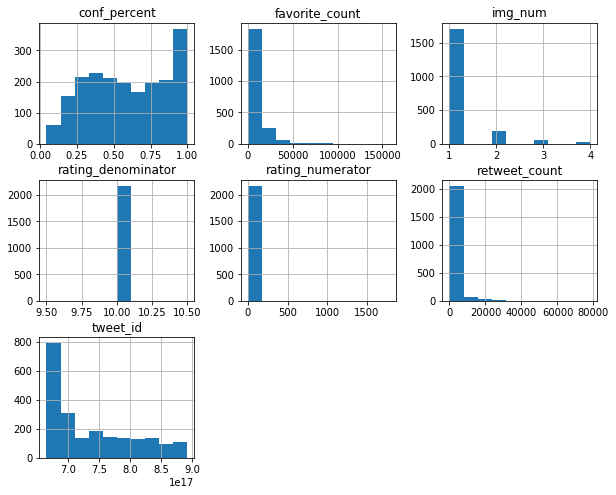

In [8]:
# Overview of distribution of numeric variables

histogram_all = df.hist(figsize=(10,8))
plt.title('Historgrams of All Numeric Variables')

**Rating Numerator V.S Retweet:** Both plots below have same patterns and show that there is no positive association between rating numerator and the number of favorite or retweet. Most of data points are lined up along the y-axis because the mean value of rating numerator is around 13. With similar ratings, the numbers of retweet and favorite for these tweets have a wide range. Those outliers that receive high ratings are scattered along the x-axis, which suggests that higher rating doesn't necessarily lead to more attention.

Text(0.5,1,'Scatter Plot of Rating Numerator V.S Retweet')

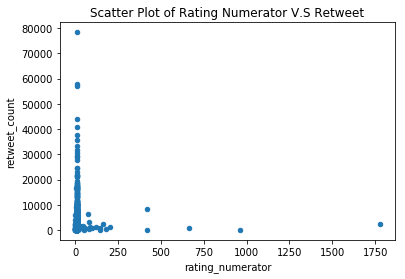

In [9]:
# Create scatter plots between rating numerator and retweet count to see if there is any relationship.

df.plot(x='rating_numerator',y='retweet_count',kind="scatter")
plt.title('Scatter Plot of Rating Numerator V.S Retweet')

Text(0.5,1,'Scatter Plot of Rating Numerator V.S Favorite')

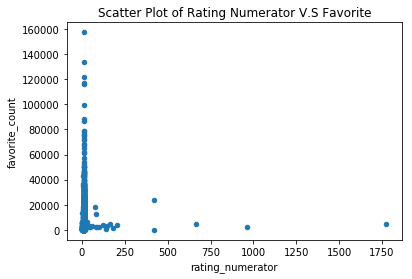

In [10]:
# Similarily, create scatter plots between rating numerator and favorite count to see if there is any relationship.

df.plot(x='rating_numerator',y='favorite_count',kind="scatter")
plt.title('Scatter Plot of Rating Numerator V.S Favorite')

**Comparing Mean Value of Metrics Group by Different Stages:** 'doggo,puppo' is the winner in terms of every metrics. However, the sample size of 'doggo,puppo', 1, is too small to be representative. Doggo and puppo are in 2nd and 3rd position respectively in terms of sample size. They both are in the top 3 highest mean of retweet and favorite counts. Such results suggest that doggo and puppo tend to be more popular in Twitter. If WeRateDog wants to increase popularity of their posts, they could post more tweets about doggo and puppo.

In [11]:
# Total number of each stage of dog in this table (most are null)

df.dog_stage.value_counts()

pupper           224
doggo             75
puppo             24
doggo,pupper      10
floofer            9
doggo,floofer      1
doggo,puppo        1
Name: dog_stage, dtype: int64

In [12]:
# Means for each numerical variable grouped by different stages

by_stage = df.groupby(['dog_stage']).mean()
by_stage

,tweet_id,rating_numerator,rating_denominator,retweet_count,favorite_count,img_num,conf_percent
dog_stage,,,,,,,
doggo,7.945997e+17,11.853333,10.0,5830.878378,16941.770270,1.285714,0.577058
"doggo,floofer",8.540102e+17,11.000000,10.0,3069.000000,15916.000000,1.000000,0.354733
"doggo,pupper",7.781766e+17,11.100000,10.0,3654.400000,12078.100000,1.111111,0.833500
"doggo,puppo",8.558515e+17,13.000000,10.0,17416.000000,44590.000000,1.000000,0.321676
floofer,7.558218e+17,11.888889,10.0,3666.555556,10162.888889,1.142857,0.609204
pupper,7.185570e+17,10.808036,10.0,2184.535714,6674.580357,1.251232,0.604692
puppo,8.070064e+17,12.041667,10.0,5721.958333,20229.416667,1.454545,0.722293


In [13]:
# Means of rating numerator sorted from highest to lowest

by_stage.sort_values(by=['rating_numerator'],ascending=False)['rating_numerator']

dog_stage
doggo,puppo      13.000000
puppo            12.041667
floofer          11.888889
doggo            11.853333
doggo,pupper     11.100000
doggo,floofer    11.000000
pupper           10.808036
Name: rating_numerator, dtype: float64

In [14]:
# Means of favorite count sorted from highest to lowest

by_stage.sort_values(by=['favorite_count'],ascending=False)['favorite_count']

dog_stage
doggo,puppo      44590.000000
puppo            20229.416667
doggo            16941.770270
doggo,floofer    15916.000000
doggo,pupper     12078.100000
floofer          10162.888889
pupper            6674.580357
Name: favorite_count, dtype: float64

In [15]:
# Means of retweet count sorted from highest to lowest

by_stage.sort_values(by=['retweet_count'],ascending=False)['retweet_count']

dog_stage
doggo,puppo      17416.000000
doggo             5830.878378
puppo             5721.958333
floofer           3666.555556
doggo,pupper      3654.400000
doggo,floofer     3069.000000
pupper            2184.535714
Name: retweet_count, dtype: float64

**Comparing Mean Value of Metrics Group by Top 10 Breeds:** The breed that WeRateDogs posts the most is golden retriever. In terms of rating numerator, it is obvious that WeRateDogs favors Labrador retriever and Golden retriever more, since the ratings for both are highest among all the breeds. Yet the summary statistics shows that Samoyed has the highest number of both retweet and favorite. Golden retriever and Labrador retriever follow along. The results show that Samoyed is the most popular breed on Twitter and gets more attention. Again, the sample size of Samoyed is only 40 and it is possible that bias exist in the results.

In [16]:
# Total number of each breed of dog in this table (Top 10 breeds)

df.breed_predition.value_counts().head(10)

Golden_retriever      139
Labrador_retriever     95
Pembroke               88
Chihuahua              79
Pug                    54
Chow                   41
Samoyed                40
Pomeranian             38
Toy_poodle             38
Malamute               29
Name: breed_predition, dtype: int64

In [17]:
# Extract the rows of top 10 breeds

by_breed = df[df['breed_predition'].isin(["Golden_retriever","Labrador_retriever",
                                                                           "Pembroke","Chihuahua",
                                                                           "Pug","Chow","Samoyed",
                                                                           "Pomeranian","Toy_poodle","Malamute"]) ]

In [24]:
by_breed

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,source_name,dog_stage,retweet_count,favorite_count,jpg_url,img_num,breed_predition,conf_percent,dog_or_not
1,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,13,10,Tilly,Twitter for iPhone,NaN,5736.0,31354.0,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,Chihuahua,0.323581,True
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,Twitter for iPhone,NaN,3796.0,23627.0,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,Chihuahua,0.716012,True
7,890729181411237888,2017-07-28 00:22:40,When you watch your owner call another dog a g...,13,10,None,Twitter for iPhone,NaN,17280.0,61372.0,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,2.0,Pomeranian,0.566142,True
9,890240255349198849,2017-07-26 15:59:51,This is Cassie. She is a college pup. Studying...,14,10,CNonessie,Twitter for iPhone,doggo,6738.0,30027.0,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,1.0,Pembroke,0.511319,True
10,890006608113172480,2017-07-26 00:31:25,This is Koda. He is a South Australian decksha...,13,10,KodNone,Twitter for iPhone,NaN,6729.0,28909.0,https://pbs.twimg.com/media/DFnwSY4WAAAMliS.jpg,1.0,Samoyed,0.957979,True
12,889665388333682689,2017-07-25 01:55:32,Here's a puppo that seems to be on the fence a...,13,10,None,Twitter for iPhone,puppo,9170.0,45288.0,https://pbs.twimg.com/media/DFi579UWsAAatzw.jpg,1.0,Pembroke,0.966327,True
14,889531135344209921,2017-07-24 17:02:04,This is Stuart. He's sporting his favorite fan...,13,10,StuNonert,Twitter for iPhone,puppo,2066.0,14248.0,https://pbs.twimg.com/media/DFg_2PVW0AEHN3p.jpg,1.0,Golden_retriever,0.953442,True
16,888917238123831296,2017-07-23 00:22:39,This is Jim. He found a fren. Taught him how t...,12,10,Jim,Twitter for iPhone,NaN,4132.0,27440.0,https://pbs.twimg.com/media/DFYRgsOUQAARGhO.jpg,1.0,Golden_retriever,0.714719,True
17,888804989199671297,2017-07-22 16:56:37,This is Zeke. He has a new stick. Very proud o...,13,10,Zeke,Twitter for iPhone,NaN,3896.0,24098.0,https://pbs.twimg.com/media/DFWra-3VYAA2piG.jpg,1.0,Golden_retriever,0.469760,True
22,887473957103951883,2017-07-19 00:47:34,This is Canela. She attempted some fancy porch...,13,10,CNonenelNone,Twitter for iPhone,NaN,16522.0,64857.0,https://pbs.twimg.com/media/DFDw2tyUQAAAFke.jpg,2.0,Pembroke,0.809197,True


In [18]:
# Means for each numerical variable grouped by top 10 breeds

by_breed = by_breed.query('dog_or_not == True').groupby(['breed_predition']).mean()

In [19]:
by_breed

,tweet_id,rating_numerator,rating_denominator,retweet_count,favorite_count,img_num,conf_percent
breed_predition,,,,,,,
Chihuahua,7.237484e+17,10.708861,10.0,2555.037975,8196.860759,1.253165,0.588905
Chow,7.515656e+17,11.609756,10.0,2562.658537,9309.634146,1.292683,0.615648
Golden_retriever,7.570117e+17,13.208633,10.0,3234.726619,11426.417266,1.309353,0.721001
Labrador_retriever,7.479198e+17,13.905263,10.0,3385.741935,10732.935484,1.147368,0.659139
Malamute,7.493521e+17,10.896552,10.0,2268.344828,8078.793103,1.241379,0.589451
Pembroke,7.560529e+17,11.443182,10.0,2838.806818,10618.943182,1.261364,0.717223
Pomeranian,7.197643e+17,12.868421,10.0,2526.473684,7525.921053,1.342105,0.743606
Pug,7.157859e+17,10.240741,10.0,1610.092593,5435.481481,1.129630,0.759223
Samoyed,7.513032e+17,11.700000,10.0,3981.153846,12365.487179,1.175000,0.747088


In [20]:
# Means of rating numerator sorted from highest to lowest

by_breed.sort_values(by=['rating_numerator'],ascending=False)['rating_numerator'].head(5)

breed_predition
Labrador_retriever    13.905263
Golden_retriever      13.208633
Pomeranian            12.868421
Samoyed               11.700000
Chow                  11.609756
Name: rating_numerator, dtype: float64

In [21]:
# Means of favorite count sorted from highest to lowest

by_breed.sort_values(by=['favorite_count'],ascending=False)['favorite_count'].head(5)

breed_predition
Samoyed               12365.487179
Golden_retriever      11426.417266
Labrador_retriever    10732.935484
Pembroke              10618.943182
Chow                   9309.634146
Name: favorite_count, dtype: float64

In [22]:
# Means of retweet count sorted from highest to lowest

by_breed.sort_values(by=['retweet_count'],ascending=False)['retweet_count'].head(5)

breed_predition
Samoyed               3981.153846
Labrador_retriever    3385.741935
Golden_retriever      3234.726619
Pembroke              2838.806818
Chow                  2562.658537
Name: retweet_count, dtype: float64